## Tasca M4 T01

### Importació i tractament de la base de dades per fer els exercicis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
lloguer=pd.read_csv(r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\DATA SCIENCE-BARCELONA ACTIVA\SPRINT 4.- VISUALITZACIÓ GRAFICA\DATASETS\preu lloguer per trimestre i barri.csv")

lloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [3]:
lloguer.shape

(584, 8)

In [37]:
lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [43]:
#Per canviar el dtype d'una columna. Es pot fer de dos maneres. En aquest cas la primera no em va funcionar i sí la segona

# 1 lloguer['Preu']=lloguer['Preu'].astype(float, errors='raise')

lloguer['Preu']= pd.to_numeric(lloguer['Preu'],errors='coerce')
lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [38]:
lloguer.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


In [ ]:
#mirar si hay duplicados
temp_lloguer=pd.concat([lloguer,lloguer], axis=0)
temp_lloguer.shape

In [ ]:
temp_lloguer=temp_lloguer.drop_duplicates()
temp_lloguer.shape #como el número de filas es igual al original nos indica que no tenemos duplicados

In [44]:
#Para ver el número de nulos que tengo en todas las columnas
lloguer.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

In [4]:
#Si los quisiera eliminar sin más
#lloguer.dropna()
lloguer.dropna(inplace=True) #tengo que mirar si los quita del archivo original o solo del archivo que trabajo per no los guarda a csv

In [45]:
lloguer_null=lloguer[lloguer.Preu.isnull()] #Per veure els nuls
lloguer_null

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
126,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [46]:
lloguer_null.groupby('Lloguer_mitja').agg(np.size) #Para sabetr el número de ocurrencias que tienes

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu
Lloguer_mitja,,,,,,,
Lloguer mitjà mensual (Euros/mes),22,22,22,22,22,22,22
Lloguer mitjà per superfície (Euros/m2 mes),22,22,22,22,22,22,22


In [47]:
#Para mirar el número de ocurrencias según barrios y districtos para ver ocurrencias 
lloguer_null.groupby(['Lloguer_mitja','Nom_Districte','Nom_Barri']).agg(np.size)

Any  \
Lloguer_mitja                               Nom_Districte  Nom_Barri                         
Lloguer mitjà mensual (Euros/mes)           Horta-Guinardó la Clota                      4   
                                            Nou Barris     Can Peguera                   4   
                                                           Torre Baró                    4   
                                                           Vallbona                      4   
                                            Sant Andreu    Baró de Viver                 2   
                                            Sants-Montjuïc la Marina del Prat Vermell    4   
Lloguer mitjà per superfície (Euros/m2 mes) Horta-Guinardó la Clota                      4   
                                            Nou Barris     Can Peguera                   4   
                                                           Torre Baró                    4   
                                                           Vallbona                      4   
                                            Sant Andreu    Baró de Viver                 2   
                                            Sants-Montjuïc la Marina del Prat Vermell    4   

                                                                                       Trimestre  \
Lloguer_mitja                               Nom_Districte  Nom_Barri                               
Lloguer mitjà mensual (Euros/mes)           Horta-Guinardó la Clota                            4   
                                            Nou Barris     Can Peguera                         4   
                                                           Torre Baró                          4   
                                                           Vallbona                            4   
                                            Sant Andreu    Baró de Viver                       2   
                                            Sants-Montjuïc la Marina del Prat Vermell          4   
Lloguer mitjà per superfície (Euros/m2 mes) Horta-Guinardó la Clota                            4   
                                            Nou Barris     Can Peguera                         4   
                                                           Torre Baró                          4   
                                                           Vallbona                            4   
                                            Sant Andreu    Baró de Viver                       2   
                                            Sants-Montjuïc la Marina del Prat Vermell          4   

                                                                                       Codi_Districte  \
Lloguer_mitja                               Nom_Districte  Nom_Barri                                    
Lloguer mitjà mensual (Euros/mes)           Horta-Guinardó la Clota                                 4   
                                            Nou Barris     Can Peguera                              4   
                                                           Torre Baró                               4   
                                                           Vallbona                                 4   
                                            Sant Andreu    Baró de Viver                            2   
                                            Sants-Montjuïc la Marina del Prat Vermell               4   
Lloguer mitjà per superfície (Euros/m2 mes) Horta-Guinardó la Clota                                 4   
                                            Nou Barris     Can Peguera                              4   
                                                           Torre Baró                               4   
                                                           Vallbona                                 4   
                                            Sant Andreu    Baró de Viver                            2   
    

In [48]:
#Para eliminar los nulos
lloguer.dropna(inplace=True)

In [49]:
lloguer.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [5]:
lloguer[['Nom_Districte','Nom_Barri']].groupby('Nom_Districte').agg(np.size)

,Nom_Barri
Nom_Districte,
Ciutat Vella,32
Eixample,48
Gràcia,40
Horta-Guinardó,80
Les Corts,24
Nou Barris,80
Sant Andreu,52
Sant Martí,80
Sants-Montjuïc,56


### Exercici 1 i Exercici 2

### 1.1. Visualització d'una variable categòrica

#### Num de barris en cada districte

In [7]:
#Per comptar valors unics que hi ha (número de barris a cada districte
districte= lloguer[['Nom_Districte','Nom_Barri']].groupby('Nom_Districte').Nom_Barri.nunique().sort_values()

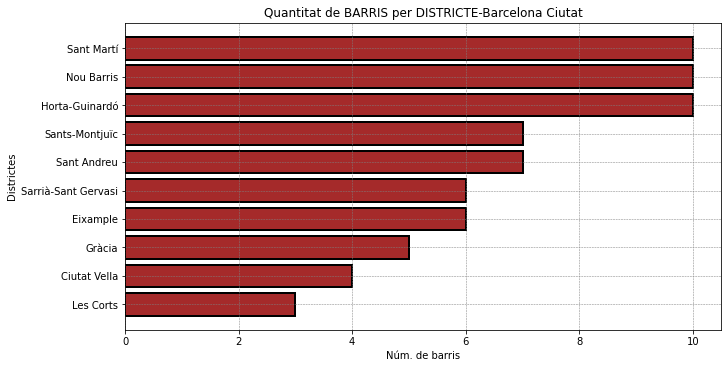

In [14]:
fig,ax=plt.subplots(figsize=(10,5), layout='constrained')
#Crear gràfic de barres
ax.barh(districte.index, districte[0:], color='brown', edgecolor='black', linewidth=2)
#Posat els títols dels eixos
ax.set_xlabel('Núm. de barris')
ax.set_ylabel('Districtes')
#Afegir una trama grisa
ax.grid(color='grey',linestyle='--',linewidth=0.5)
# Posar el titol al gràfic(axes)
ax.set_title('Quantitat de BARRIS per DISTRICTE-Barcelona Ciutat')
# Per exportar el gràfic a imatge
#Si no es vol exportar utilitzar plt.show() per visualitzar

fig.savefig('barris_bcn.png', transparent=True);

### 1.2 Visualització d'una variable númerica (Preu)
#### Frequència de preus. Es divideix en dos gràfics ja que el lloguer mitjà té dades de lloguer mitjà mensual i de lloguer mensual/m2

In [17]:
Preu=lloguer[['Trimestre','Nom_Districte','Lloguer_mitja','Preu']]

In [18]:
Preu_mitja=Preu[Preu['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']
Preu_mitja.head()


,Trimestre,Nom_Districte,Lloguer_mitja,Preu
0,1,Ciutat Vella,Lloguer mitjà mensual (Euros/mes),759.2
1,1,Ciutat Vella,Lloguer mitjà mensual (Euros/mes),929.6
2,1,Ciutat Vella,Lloguer mitjà mensual (Euros/mes),808.9
3,1,Ciutat Vella,Lloguer mitjà mensual (Euros/mes),879.4
4,1,Eixample,Lloguer mitjà mensual (Euros/mes),918.0


In [19]:
Preu_m2=Preu[Preu['Lloguer_mitja']!='Lloguer mitjà mensual (Euros/mes)']
Preu_m2.head()

,Trimestre,Nom_Districte,Lloguer_mitja,Preu
73,1,Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,1,Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,1,Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,1,Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,1,Eixample,Lloguer mitjà per superfície (Euros/m2 mes),12.9


#### Gràfic amb Matplotlib

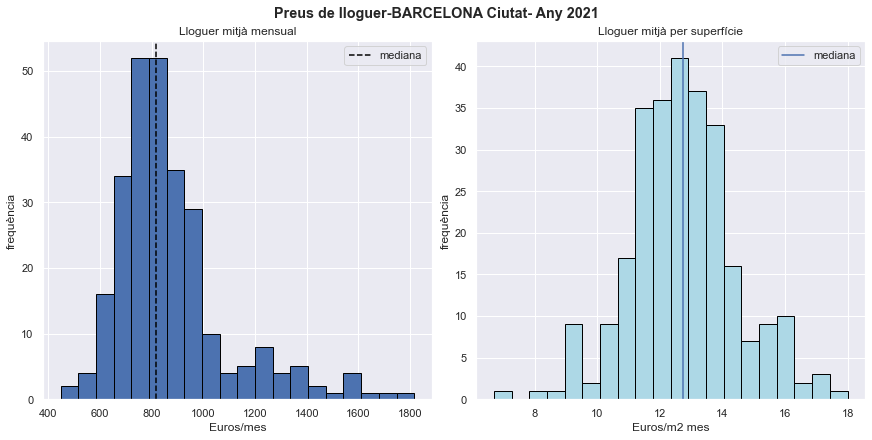

In [50]:
median_Preu_mitja= Preu_mitja['Preu'].median()
median_Preu_m2 = Preu_m2['Preu'].median()
#Construir el marc per 2 figures per q fila
fig, axs = plt.subplots(1,2,figsize=(12,6),layout='constrained')
#Introduir dades
axs[0].hist(Preu_mitja['Preu'],bins=20, edgecolor='black')
axs[1].hist(Preu_m2['Preu'],bins=20, color='lightblue', edgecolor='black');
#Titols de l'eis x e y
axs[0].set_xlabel('Euros/mes')
axs[1].set_xlabel('Euros/m2 mes')
axs[0].set_ylabel('frequència')
axs[1].set_ylabel('frequència')
#Titol del gràfic
axs[0].set_title('Lloguer mitjà mensual')
axs[1].set_title('Lloguer mitjà per superfície')
#Per posar la linia vertical de la mediana. S'inclou llegenda
axs[0].axvline(median_Preu_mitja, color='black', ls='--', label='mediana')
axs[1].axvline(median_Preu_m2, color='b', ls='-', label='mediana')
#Per poder veure la llegenda introduida en la lina vertical
axs[0].legend()
axs[1].legend()
#Per poder posar un títol principal
fig.suptitle('Preus de lloguer-BARCELONA Ciutat- Any 2021',fontweight='bold')

fig.savefig('Preus_lloguer_bcn.jpg', transparent=True);


#### Gràfic amb Seaborn

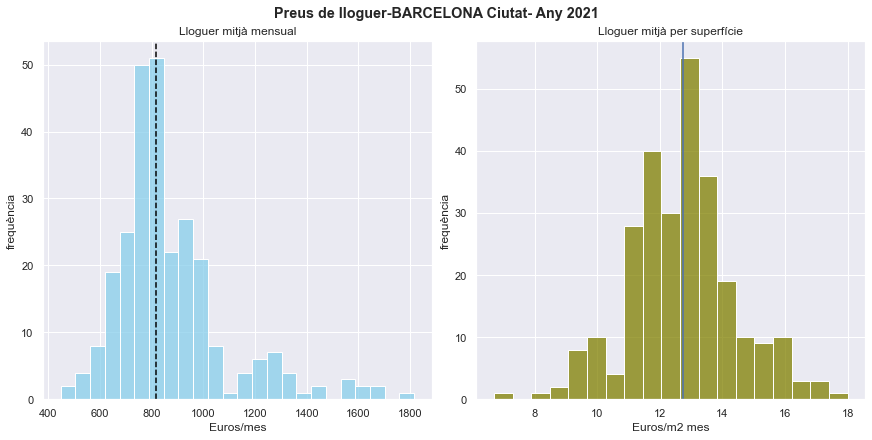

In [24]:
sns.set(style='darkgrid')

fig, axs = plt.subplots(1,2, figsize=(12,6), layout='constrained')

sns.histplot(data=Preu_mitja, x='Preu', color='skyblue',ax=axs[0])
sns.histplot(data=Preu_m2, x='Preu', color='olive',ax=axs[1])
fig.suptitle('Preus de lloguer-BARCELONA Ciutat- Any 2021',fontweight='bold')

axs[0].set_xlabel('Euros/mes')
axs[1].set_xlabel('Euros/m2 mes')
axs[0].set_ylabel('frequència')
axs[1].set_ylabel('frequència')
axs[0].axvline(median_Preu_mitja, color='black', ls='--', label='mediana')
axs[1].axvline(median_Preu_m2, color='b', ls='-', label='mediana')

axs[0].set_title('Lloguer mitjà mensual')
axs[1].set_title('Lloguer mitjà per superfície')

fig.savefig('Preus_lloguer_bcn_seaborn.png', transparent=True);

### 1.3 Visualització d'una variable categòrica i una numèrica
#### Preus de lloguer per districte

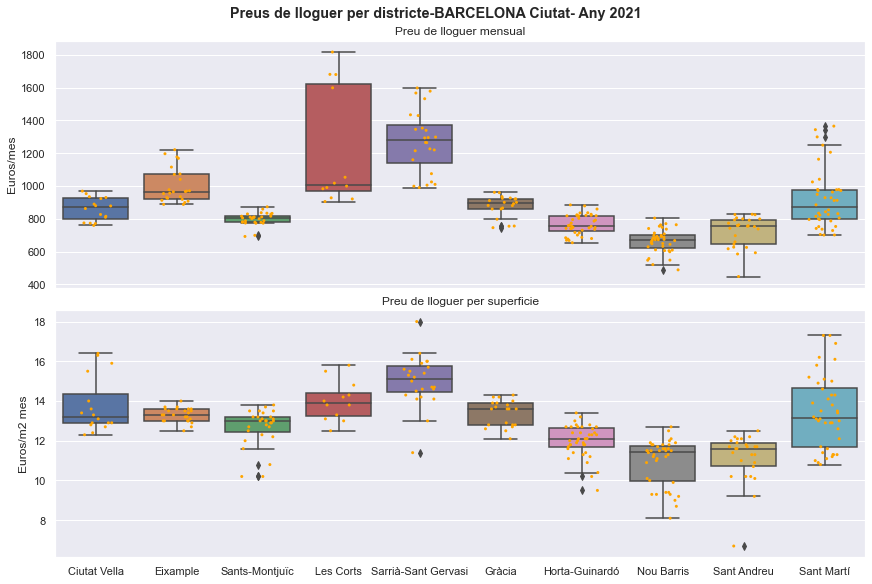

In [29]:
fig, axs = plt.subplots(2,1,figsize=(12,8),layout='constrained')

fig.suptitle('Preus de lloguer per districte-BARCELONA Ciutat- Any 2021',fontweight='bold')

g1=sns.boxplot(x='Nom_Districte',y='Preu',data=Preu_mitja,ax=axs[0])
g2=sns.boxplot(x='Nom_Districte',y='Preu',data=Preu_m2,ax=axs[1])
# Per poder representar la mida de mostra i la seva distibució
g3=sns.stripplot(x='Nom_Districte', y='Preu', data=Preu_mitja, color="orange", jitter=0.2, size=3,ax=axs[0])
g4=sns.stripplot(x='Nom_Districte', y='Preu', data=Preu_m2, color="orange", jitter=0.2, size=3, ax=axs[1])
#Arreglar els axes com volem (posar els titols després de haver posat les dues series d'un mateix axes, sino no sortirá)
g1.set(ylabel='Euros/mes')
g2.set(ylabel='Euros/m2 mes')
g1.set(title='Preu de lloguer mensual')
g2.set(title='Preu de lloguer per superficie')

g1.set(xlabel=None)
g2.set(xlabel=None)
#Per a que  no hi hagi el nom dels districtes en un desl gràfics
g1.set(xticklabels=[])

fig.savefig('Preus_lloguer per districe_bcn_seaborn.png', transparent=True);

### 1.4 Visualització de dues variables numériqes 
#### Preus de lloguer per trimestre

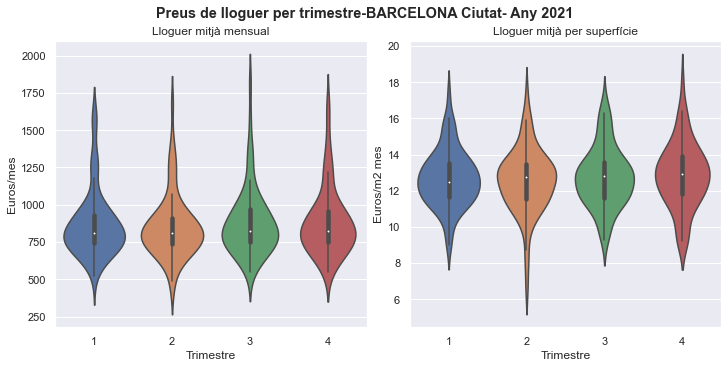

In [28]:
fig, axs = plt.subplots(1,2,figsize=(10,5),layout='constrained')
fig.suptitle('Preus de lloguer per trimestre-BARCELONA Ciutat- Any 2021',fontweight='bold')

g1=sns.violinplot(x='Trimestre', y='Preu',data=Preu_mitja,ax=axs[0])
g2=sns.violinplot(x=Preu_m2['Trimestre'], y=Preu_m2['Preu'],ax=axs[1])

g1.set(ylabel='Euros/mes')
g2.set(ylabel='Euros/m2 mes')
g1.set_title('Lloguer mitjà mensual')
g2.set_title('Lloguer mitjà per superfície')

fig.savefig('Preus_lloguer per trimestre_bcn.png', transparent=True);

### 1.5 Visualització de 3 variables
### Preu per districte i trimestre. Es fan dos gràfics diferents per veure quin és més visual

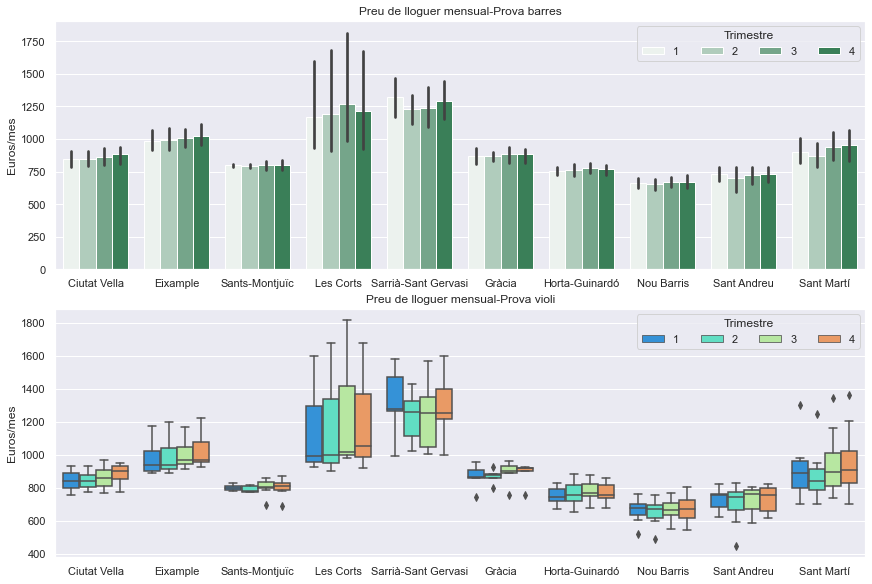

In [30]:
fig,axs=plt.subplots(2,1,figsize=(12,8),layout='constrained')

g1=sns.barplot(x='Nom_Districte',y='Preu', hue='Trimestre',data=Preu_mitja,color='seagreen', ax=axs[0])
g2=sns.boxplot(x='Nom_Districte',y='Preu', hue='Trimestre',data=Preu_mitja, palette='rainbow',ax=axs[1])
g1.set(ylabel='Euros/mes')
g2.set(ylabel='Euros/mes')
g1.set(title='Preu de lloguer mensual-Prova barres' )
g2.set(title='Preu de lloguer mensual-Prova violi')
# Per canviar la configuració de la llegenda i posar-la en horitzontal(columnes)
axs[0].legend(title='Trimestre', ncol=4)
axs[1].legend(title='Trimestre', ncol=4)
g1.set(xlabel=None)
g2.set(xlabel=None)
fig.savefig('Preus_lloguer per trimestre i districte_bcn.png', transparent=True);

## Exercici 3

### Visualització del preu del lloguer per barris i districte

In [33]:
PreuB=lloguer[['Nom_Barri','Nom_Districte','Lloguer_mitja','Preu']]
Preu_m2B=PreuB[PreuB['Lloguer_mitja']!='Lloguer mitjà mensual (Euros/mes)']
Preu_m2B.head()

,Nom_Barri,Nom_Districte,Lloguer_mitja,Preu
73,el Raval,Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,el Barri Gòtic,Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,la Barceloneta,Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,el Fort Pienc,Eixample,Lloguer mitjà per superfície (Euros/m2 mes),12.9


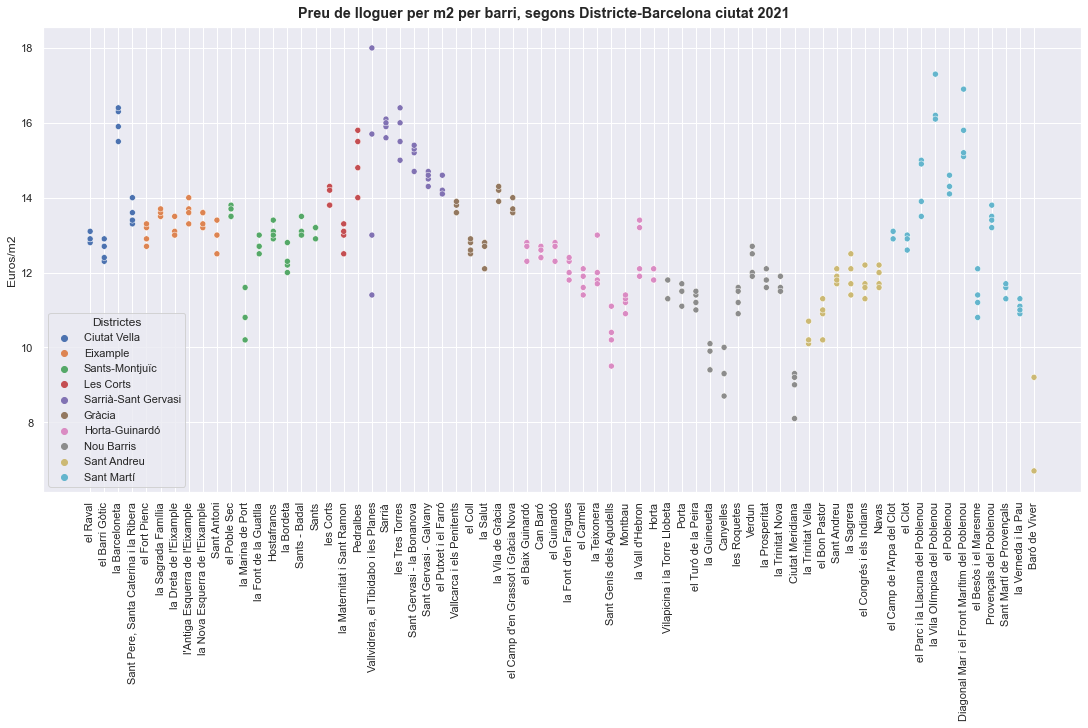

In [34]:
fig,ax=plt.subplots(figsize=(15,10),layout='constrained')
fig.suptitle('Preu de lloguer per m2 per barri, segons Districte-Barcelona ciutat 2021',fontweight='bold')

sns.scatterplot(x='Nom_Barri',y='Preu',hue='Nom_Districte',data=Preu_m2B)
ax.set(xlabel=None)
ax.set(ylabel='Euros/m2')
plt.xticks(rotation='vertical')

ax.legend(title='Districtes')

           
fig.savefig('Preus_lloguer per barri_bcn.png');